# Lecture 3: Vector Spaces

Based on: Geoff Gordon's [vector spaces lecture notes](https://qna.cs.cmu.edu/#/pages/view/24) and [geometry of functions lecture notes](https://qna.cs.cmu.edu/#/pages/view/35)



Vector spaces are sets of objects (vectors) that can be added together and multiplied by scalars, with the result being an element of the same set.

Addition and multiplication satisfy the following:

(for $u$, $v$ and $w$ in the vector space and $c$, $c_1$, $c_2$ scalars)

- $u+(v+w) = (u+v)+w$
- $(u+v) = (v+u)$
- $\forall v, \exists -v : v +(-v) = 0$
- $\exists \text{ vector } 0 : v +0 = v$
- $\exists \text{ vector } 1 : 1v = v$
- $c_1(c_2v) = (c_1c_2)v$
- $c(u+v) = cu + cv$
- $(c_1+c_2)v = c_1v+c_2v $

Example: $\mathbb{R}^n$:
if $u\in \mathbb{R}^n$ and $v\in \mathbb{R}^n$ then $au+v\in \mathbb{R}^n$, and all the above statements hold. 

Other examples:

- Matrices $\mathbb{R}^{m\times n}$

- Functions $\mathbb{R}\rightarrow\mathbb{R}$



### Vector space of functions

How can a function be a feature space?

It's an infinitely dimensional feature space. To imagine it, think about what happens when you plot a function. We always use a finite sampling of the input space, and compute the output for these values.


[  0.00000000e+00   9.99999833e-07   3.99999733e-06   8.99998650e-06
   1.59999573e-05]


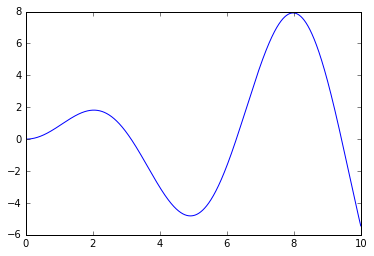

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,10001)
f = np.sin(x)*x

plt.plot(x,f); #'.'
print(f[:5])

We can perform addition and multiplication of such functions defined on a finite sample of $\mathbb{R}$:

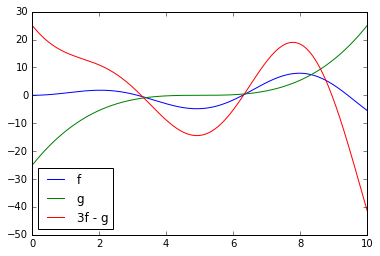

In [2]:
g = 0.2*(x-5)**3

h = 3*f -g

plt.plot(x,f,label='f')
plt.plot(x,g,label='g')
plt.plot(x,h,label='3f - g')
plt.legend(loc='lower left');

Now let's go back to our original vector space consisting of functions $\mathbb{R}\rightarrow\mathbb{R}$. You can now think of each vector $f$ as being an infinite vector, defined for each input $x \in \mathbb{R}$. We call $\mathbb{R}$ the index set for $f$.

## Inner product spaces

We can upgrade the vector space to an inner product space by defining an inner product $\langle u,v\rangle\in\mathbb R$.

An inner product satisfies:

(if $V$ is a vector space, $\langle. , .\rangle $ an inner product, $u$, $v$ and $w$ in V and $c$ is a scalar)

- $\langle u,v\rangle = \langle v,u\rangle$
- $\langle v,v\rangle \ge 0$ and $\langle v,v\rangle = 0$ iff $ v= 0$
- $\langle u+v,w\rangle = \langle u,w\rangle + \langle v,w\rangle$
- $\langle cu,v\rangle = c\langle u,v\rangle$

Examples of inner products:
- For $\mathbb{R}^n$, the usual dot product $\langle x,y\rangle = x \cdot y = x^\top y= \sum_{i=1}^n x_iy_i$
- For $\mathbb{R}^n$, the Mahalanobis inner product $\langle x,y\rangle =  x^\top M y $ where $M=A^\top A$  is positive semi-definite (will revisit this later).
- For matrices $\mathbb{R}^{m\times n}$, the inner product $\langle X, Y\rangle = \sum_{ij}X_{ij} Y_{ij} = \text{tr}(X^TY)$
- For functions $\mathbb{R}\rightarrow\mathbb{R}$, $\langle f, g\rangle = \int_X f(x) g(x) dx$

An inner product allows us to define a norm $\|x\| = \sqrt{\langle x, x\rangle}$. Given this, we are able to test for other properties such as completeness (which would make us upgrade a space even further). With the inner product we can also define geometric concepts such as orthogonality. 

## Example of using vector spaces for classification

We will see the example of a simple linear classifier.

We start by sampling some data

(-5.0, 3.0, -4.0, 4.0)

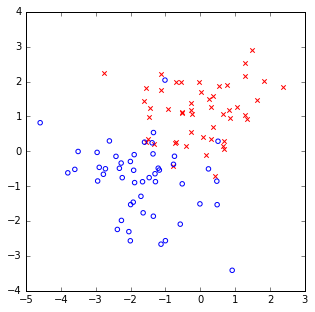

In [3]:
from sklearn import datasets

plt.figure(figsize=(5,5))
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(-5, 5))
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis('equal')

### Linear classifiers

Linear classifiers are common and rely on the following function to make a decision:

$f_{w,b}(x) = w\cdot x - b$

Let's remember what this function can mean.

We will look at an example where $x\in\mathbb{R}^2$ like above:

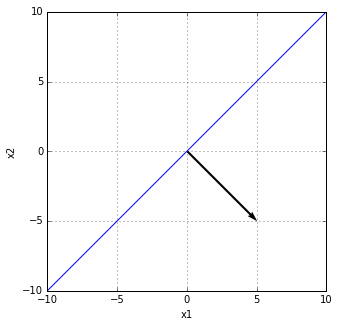

In [14]:
x1 = np.linspace(-10,10,1000)

w = [5,-5]
b = 0

x2_plot = (b - w[0]*x1)/w[1]

plt.figure(figsize=(5,5))
plt.plot(x1,x2_plot)
origin = [0], [0]
plt.quiver(*origin, w[0],w[1], color='k',angles='xy', scale_units='xy', scale=1)
plt.axis([-10,10,-10,10],'equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [5]:
x1 = np.linspace(-10,10,1000)
x2 = np.linspace(-10,10,1000)

w = [4,6]
b = 0

X1,X2 = np.meshgrid(x1, x2)
f = lambda x1,x2: w[0]*x1+w[1]*x2-b
fX = f(X1,X2)

# plt.figure(figsize=(6,5))
# cs = plt.contourf(X1, X2, fX,20,cmap='RdBu_r');
# plt.colorbar()
# plt.contour(cs, colors='k')
# origin = [0], [0]
# plt.quiver(*origin, w[0],w[1], color='k',angles='xy', scale_units='xy', scale=1)
# plt.axis([-10,10,-10,10],'equal')


### Fisher linear discriminant:

Make a decision based on the sign of $f_{w,b}(x)$:

- if $f_{w,b}(x)>0$ predict $\color{red}{\mathsf{x}}$
- if $f_{w,b}(x)<0$ predict $\color{blue}{\mathsf{o}}$

There are multiple such linear discriminant, but a special case of the fisher linear discriminant (which considers the variances equal and spherical) estimates $w$ and $b$ such as:

\begin{align*}w &= E(x\mid\text{class is }\color{red}{\mathsf{x}}) - E(x\mid \text{class is }\color{blue}{\mathsf{o}})\\ b& = w\cdot [E(x\mid\text{class is }\color{red}{\mathsf{x}}) + E(x\mid \text{class is }\color{blue}{\mathsf{o}})]/2\end{align*}

[-10, 10, -10, 10]

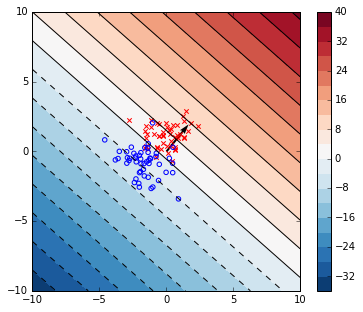

In [6]:
w_hat = np.mean(X[y == 0],axis=0) -  np.mean(X[y == 1],axis=0)
mean_means = (np.mean(X[y == 0],axis=0) +  np.mean(X[y == 1],axis=0))/2
b_hat = np.array(w_hat).dot(np.array(mean_means))


f_hat = lambda x1,x2: w_hat[0]*x1+w_hat[1]*x2-b_hat
f_hat_X = f_hat(X1,X2)


plt.figure(figsize=(6,5))

cs = plt.contourf(X1, X2, f_hat_X,20,cmap='RdBu_r');
plt.colorbar()
contours = plt.contour(cs, colors='k')
# plt.clabel(contours, inline=True, fontsize=8)
origin = [0], [0]
plt.quiver(*origin, w_hat[0],w_hat[1], color='k',angles='xy', scale_units='xy', scale=1)

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis([-10,10,-10,10],'equal')


### Nonlinear Classifiers

What if a linear classifier is not useful for our data?

(-1.5, 1.5, -1.5, 1.5)

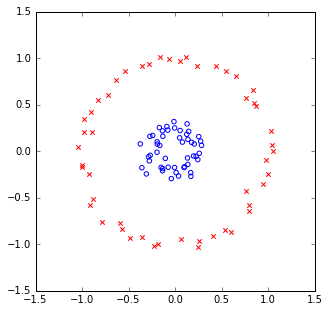

In [7]:

plt.figure(figsize=(5,5))
X, y = datasets.make_circles(n_samples=100, factor=.25,
                                      noise=.05)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis('equal')

[-2, 2, -2, 2]

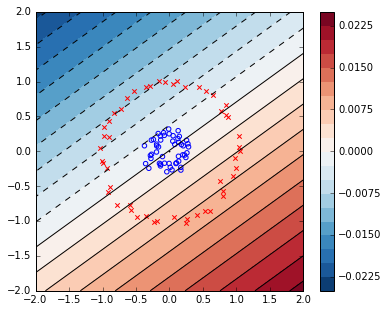

In [8]:
x1 = np.linspace(-2,2,1000)
x2 = np.linspace(-2,2,1000)
X1,X2 = np.meshgrid(x1, x2)


w_hat = np.mean(X[y == 0],axis=0) -  np.mean(X[y == 1],axis=0)
mean_means = (np.mean(X[y == 0],axis=0) +  np.mean(X[y == 1],axis=0))/2
b_hat = np.array(w_hat).dot(np.array(mean_means))


f_hat = lambda x1,x2: w_hat[0]*x1+w_hat[1]*x2-b_hat
f_hat_X = f_hat(X1,X2)


plt.figure(figsize=(6,5))

cs = plt.contourf(X1, X2, f_hat_X,20,cmap='RdBu_r');
plt.colorbar()
plt.contour(cs, colors='k')
origin = [0], [0]
plt.quiver(*origin, w_hat[0],w_hat[1], color='k',angles='xy', scale_units='xy', scale=1)

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis([-2,2,-2,2],'equal')

One solution is to use a more complicated feature space, for example:

$\phi(x) = (x_1, x_2, x_1x_2, x_1^2, x_2^2) \quad \phi\in \mathbb R^2\to \mathbb R^5\,.$

In [9]:
Phi_X = np.vstack([X[:,0], X[:,1], X[:,0]*X[:,1], X[:,0]**2, X[:,1]**2])
Phi_X = Phi_X.T


We can learn a discriminant:
    
$f_{w,b}(x) = \langle w ,\phi(x)\rangle - b$

Using (same assumptions as before):
\begin{align*}w &= E(\phi(x)\mid\text{class is }\color{red}{\mathsf{x}}) - E(\phi(x)\mid \text{class is }\color{blue}{\mathsf{o}})\\ b& = w\cdot [E(\phi(x)\mid\text{class is }\color{red}{\mathsf{x}}) + E(\phi(x)\mid \text{class is }\color{blue}{\mathsf{o}})]/2\end{align*}


[-2, 2, -2, 2]

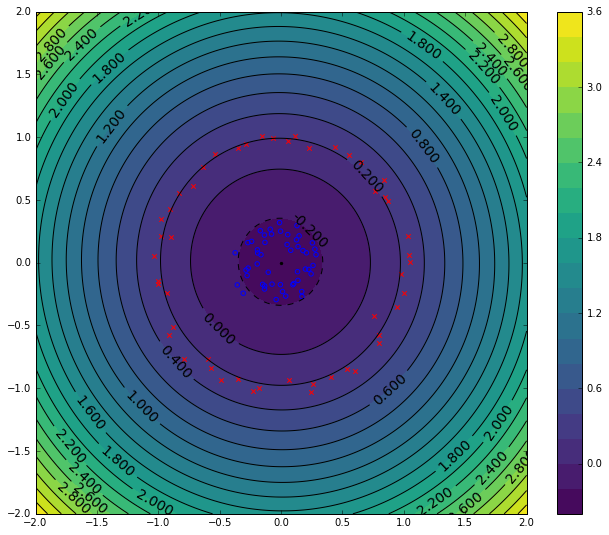

In [10]:
x1 = np.linspace(-2,2,1000)
x2 = np.linspace(-2,2,1000)
X1,X2 = np.meshgrid(x1, x2)


w_hat = np.mean(Phi_X[y == 0],axis=0) -  np.mean(Phi_X[y == 1],axis=0)
mean_means = (np.mean(Phi_X[y == 0],axis=0) +  np.mean(Phi_X[y == 1],axis=0))/2
b_hat = np.array(w_hat).dot(np.array(mean_means))


f_hat = lambda x1,x2: w_hat[0]*x1+w_hat[1]*x2+w_hat[2]*x1*x2+w_hat[3]*x1**2+w_hat[4]*x2**2-b_hat
f_hat_X = f_hat(X1,X2)


plt.figure(figsize=(11,9))

cs = plt.contourf(X1, X2, f_hat_X,20,cmap='viridis');
plt.colorbar()
contours = plt.contour(cs, colors='k')
plt.clabel(contours, inline=True, fontsize=14)
origin = [0], [0]
plt.quiver(*origin, w_hat[0],w_hat[1], color='k',angles='xy', scale_units='xy', scale=1)

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],marker='x', c='r')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],facecolors='none', edgecolors='b')
plt.axis([-2,2,-2,2],'equal')

### Infinite vector spaces

They will allow us to construct even more flexible classifiers.